In [1]:
from utils import *
from contextlib import redirect_stdout
import warnings

# Model
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

In [2]:
root_path = 'D:/Face recognition/pics'
n_components = 50

# Data preparation

In [3]:
X, y = create_database(root_path)

100%|██████████| 40/40 [00:00<00:00, 70.06it/s] 


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

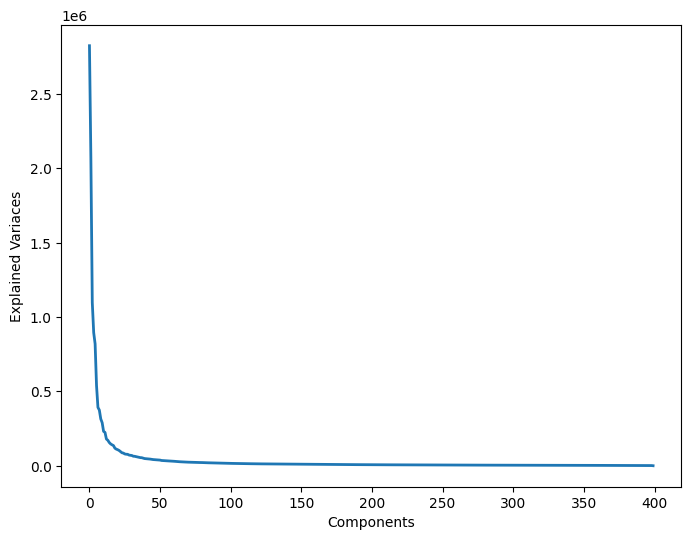

In [5]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(8,6))

plt.plot(pca.explained_variance_, linewidth=2)

plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [6]:
pca=PCA(n_components=n_components)
pca.fit(X)
X_pca=pca.transform(X)

In [7]:
pca=PCA(n_components=n_components)
pca.fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [8]:
methods = [euclidean_distance, mahattan_distance, minkowski_distance, sse,
           ab_distance, ccb_distance, mahalanobis_distance, chi2_distance,
           canbera_distance, modified_mahattan_distance]

# Fit data with distance bases

## Euclidean

100%|██████████| 80/80 [00:00<00:00, 5726.79it/s]


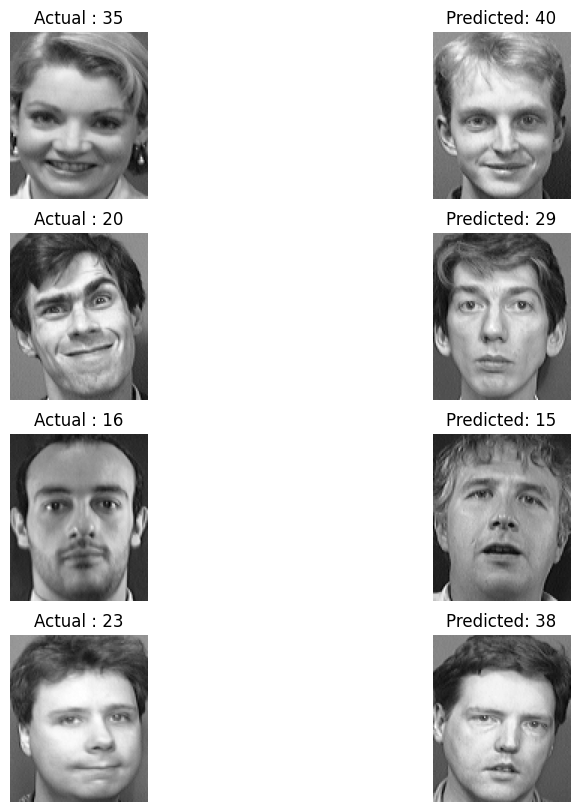

In [9]:
eu_pred, eu_idx = euclidean_distance(X_train_pca, X_test_pca, y_train)
show_wrong_match(X_train, X_test, y_train, y_test, eu_pred, eu_idx)

<function euclidean_distance at 0x0000023290C33F78>


100%|██████████| 80/80 [00:00<00:00, 8191.20it/s]

Accuracy: 0.95000


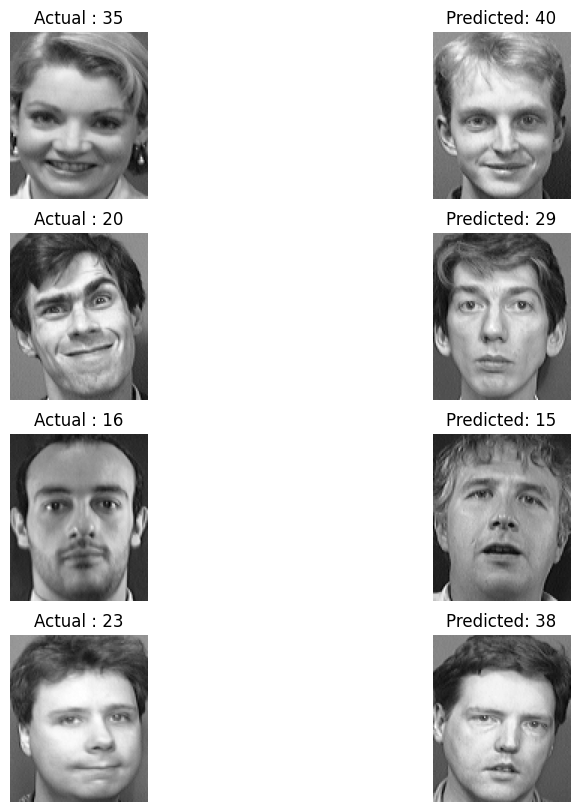

<function mahattan_distance at 0x0000023290BF99D8>
Accuracy: 0.90000


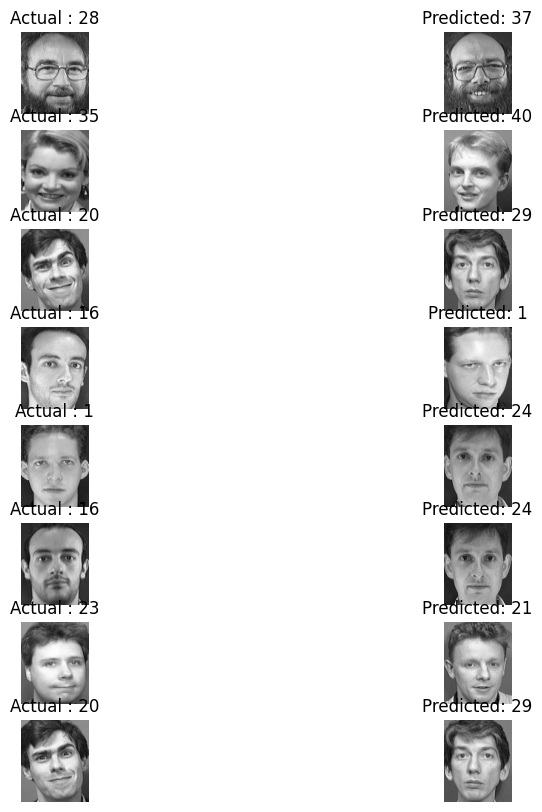

<function minkowski_distance at 0x0000023290C62798>
Accuracy: 0.93750


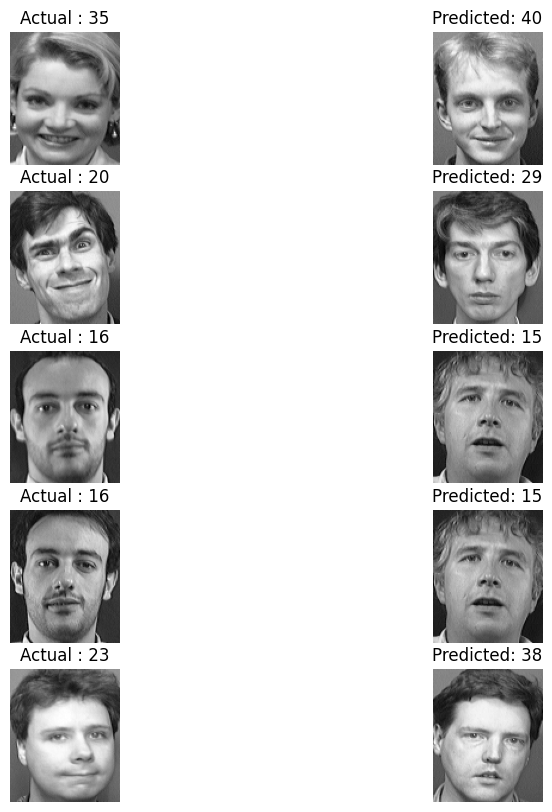

<function sse at 0x0000023290C62C18>
Accuracy: 0.95000


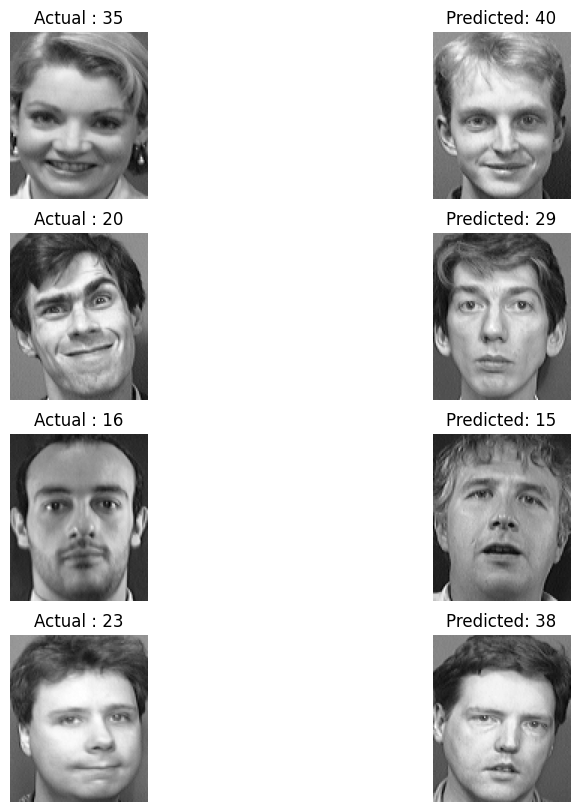

<function ab_distance at 0x0000023290C67DC8>
Accuracy: 0.96250


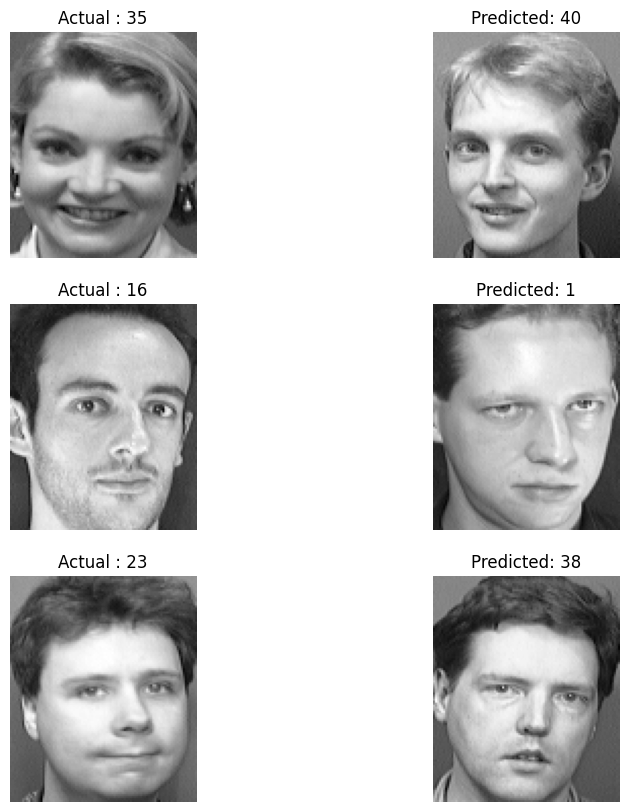

<function ccb_distance at 0x0000023290C67F78>
Accuracy: 0.96250


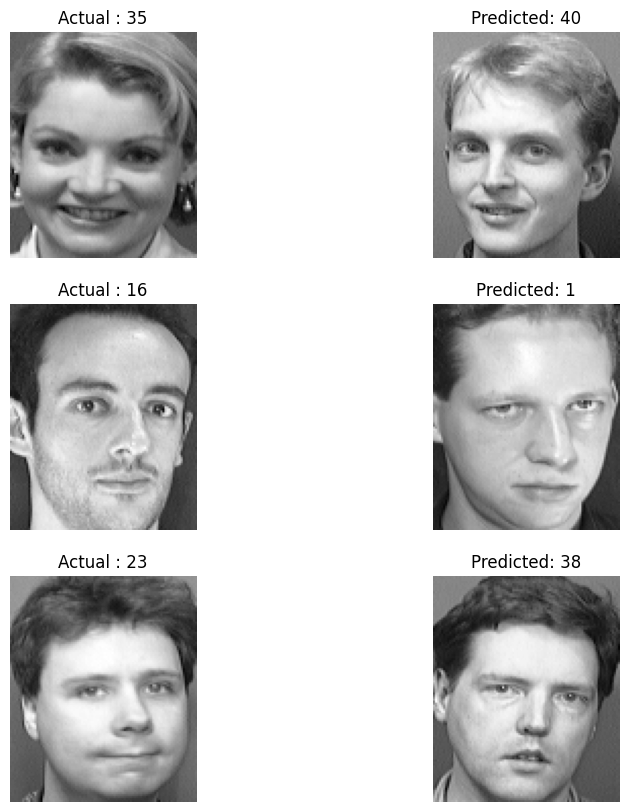

<function mahalanobis_distance at 0x0000023290C6B288>
Accuracy: 0.88750


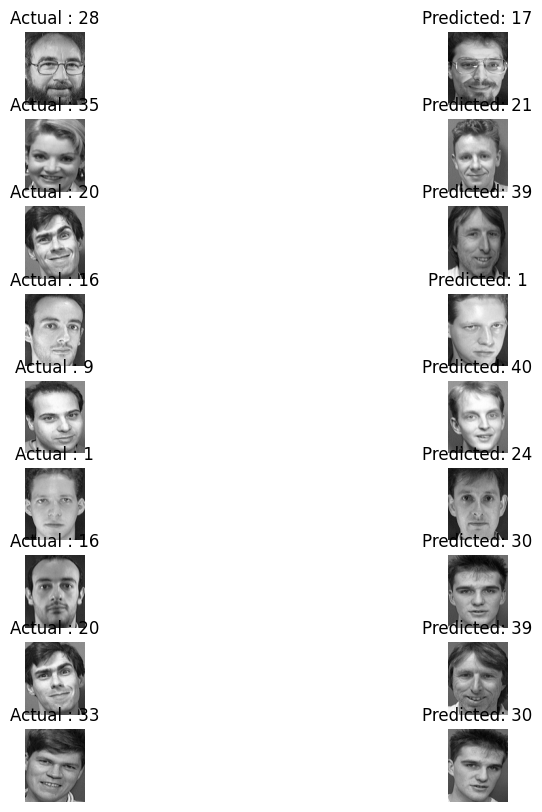

<function canbera_distance at 0x0000023290C6B168>
Accuracy: 0.88750


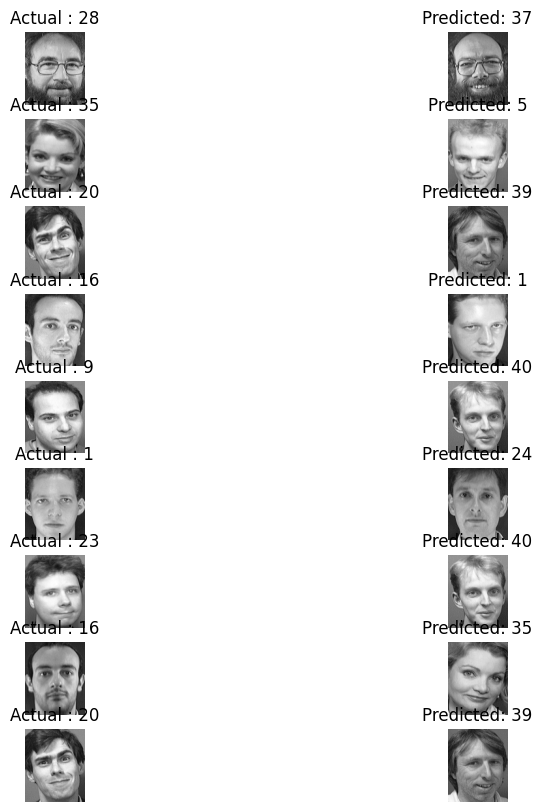

<function modified_mahattan_distance at 0x0000023290C6BDC8>
Accuracy: 0.97500


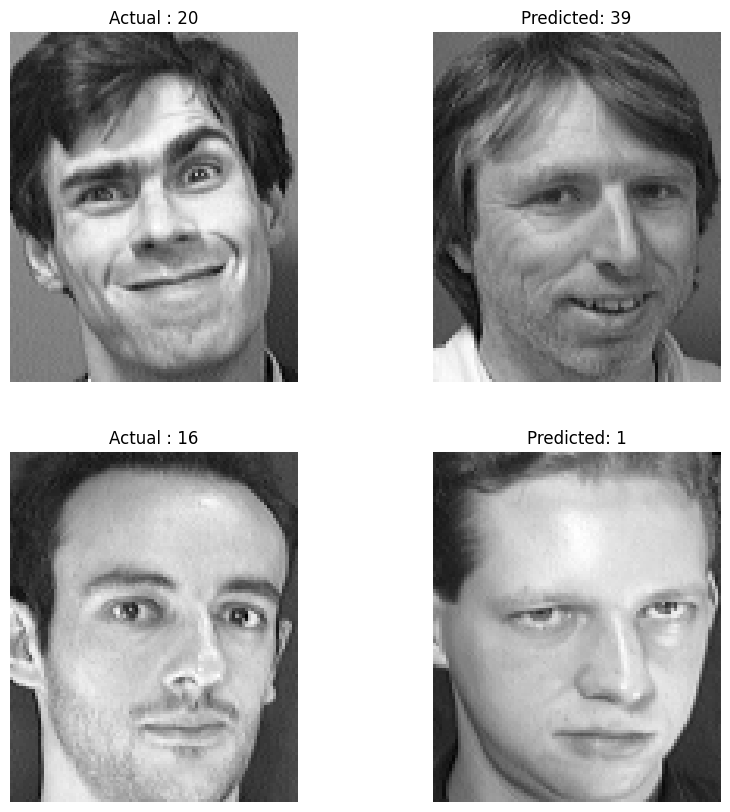

In [18]:
for method in methods:
    if method != chi2_distance:
        print(method)
        eu_pred, eu_idx = method(X_train_pca, X_test_pca, y_train)
        print(f"Accuracy: {accuracy_score(y_test, eu_pred):.5f}")
        show_wrong_match(X_train, X_test, y_train, y_test, eu_pred, eu_idx)

# Fit data with distance bases and Cross validation

In [11]:
for method in methods:
    with open(os.devnull, 'w') as f, redirect_stdout(f):
        score = cross_validation_db(X_pca, y, 5, method)
    print(f'{str(method)} cross validation score: {score:.5f}')

  0%|          | 0/80 [00:00<?, ?it/s]

100%|██████████| 80/80 [00:00<00:00, 11384.03it/s]


<function euclidean_distance at 0x0000023290C33F78> cross validation score: 0.96500
<function mahattan_distance at 0x0000023290BF99D8> cross validation score: 0.95750
<function minkowski_distance at 0x0000023290C62798> cross validation score: 0.96000
<function sse at 0x0000023290C62C18> cross validation score: 0.96500
<function ab_distance at 0x0000023290C67DC8> cross validation score: 0.96000
<function ccb_distance at 0x0000023290C67F78> cross validation score: 0.96250
<function mahalanobis_distance at 0x0000023290C6B288> cross validation score: 0.93750
<function chi2_distance at 0x0000023290C6B1F8> cross validation score: 0.01250
<function canbera_distance at 0x0000023290C6B168> cross validation score: 0.93750
<function modified_mahattan_distance at 0x0000023290C6BDC8> cross validation score: 0.97000


In [12]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)
y_pred = lda.predict(X_test_pca)

In [13]:
accuracy_score(y_test, y_pred)

0.975

# Fit data with ML model

In [14]:
models=[]
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))
models.append(("RF",RandomForestClassifier()))



In [15]:
cross_validation_ml(X_pca, y, 5, models)

LDA mean cross validations score:0.98750
LR mean cross validations score:0.98250
NB mean cross validations score:0.88750
KNN mean cross validations score:0.88000
DT mean cross validations score:0.55500
SVM mean cross validations score:0.96750
RF mean cross validations score:0.94000
